# Self Organizing Maps

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Sompy
from sompy.sompy import SOMFactory
from sompy.visualization.mapview import View2D
from sompy.visualization.hitmap import HitMapView
from sompy.visualization.umatrix import UMatrixView

# Minisom
from minisom import MiniSom

# Somber
from somber import Som
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Colors 

In [386]:
nb=10000

dat1 = np.random.uniform(0,1,nb)
dat2 = np.random.uniform(0,1,nb)
dat3 = np.random.uniform(0,1,nb)

data = np.vstack((dat1,
                  dat2,
                  dat3,
                 )).T

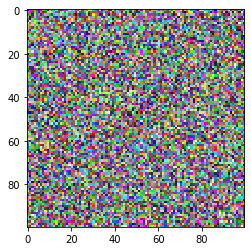

In [381]:
plt.imshow(data.reshape(100,100,3));

## Training

In [383]:
som_x, som_y = [30,30] # SOMs shape

In [393]:
som = MiniSom(som_x, som_y, data.shape[1],
                sigma=7, learning_rate=1)

som.train(data, 20000, verbose=False)
print('quantization error :', som.quantization_error(data))
print('topographic error :', som.topographic_error(data))

wts = som.get_weights()

quantization error : 0.14989943562722766
topographic error : 0.0097


## Results

### Tab 2D

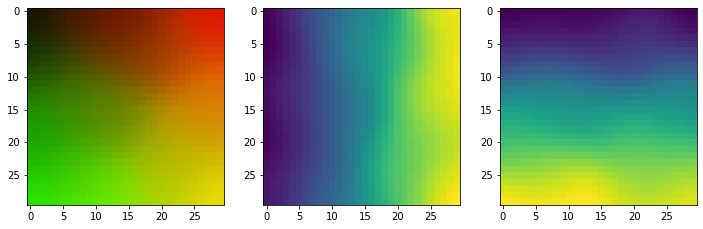

In [385]:
empty = np.zeros((som_x,som_y))

cube  = np.zeros((30,30,3))
cube[:,:,0] = wts[:,:,0]
cube[:,:,1] = wts[:,:,1]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10))

ax[0].imshow(cube)
ax[1].imshow(wts[:,:,0])
ax[2].imshow(wts[:,:,1]);

### Tab 3D

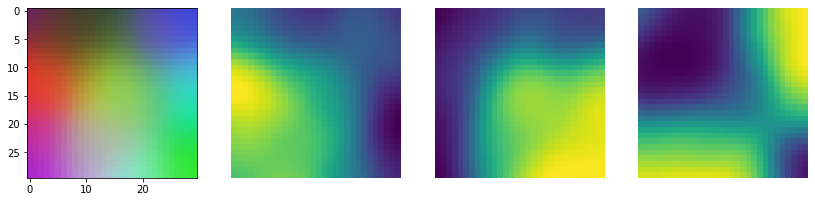

In [394]:
fig, ax = plt.subplots(nrows=1, ncols=data.shape[1]+1, figsize=(14,12))

ax[0].imshow(wts)

for i in range(data.shape[1]):
    ax[i+1].imshow(wts[:,:,i])
    ax[i+1].set_axis_off();

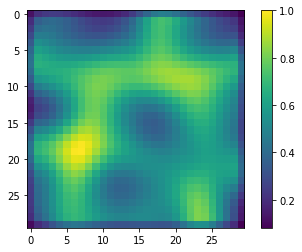

In [395]:
plt.imshow(som.distance_map())
plt.colorbar();

# COSMOS dataset

In [542]:
from astropy.io import fits

path_CS_fits = "datas/real_galaxy_catalog_25.2_fits.fits"

with fits.open(path_CS_fits) as hdul:
    hdr = hdul[0].header # header
    data_cs = hdul[1].data # data
    cols = hdul[1].columns # cols information
    Names = cols.names # cols names

In [543]:
hdul.info()

Filename: datas/real_galaxy_catalog_25.2_fits.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     36   87798R x 14C   [J, D, D, D, 8D, 16D, 5J, D, D, D, J, J, 3D, 4D]   


In [544]:
Names

['IDENT',
 'mag_auto',
 'flux_radius',
 'zphot',
 'sersicfit',
 'bulgefit',
 'fit_status',
 'fit_mad_s',
 'fit_mad_b',
 'fit_dvc_btt',
 'use_bulgefit',
 'viable_sersic',
 'hlr',
 'flux']

In [545]:
def cut_hight_hlr(cat, lim): # delete hlr problems
    idx = np.where(cat['sersicfit'][:,1]>lim)[0]
    print("nb d'elements suppr", idx.shape)
    cat = np.delete(cat,idx)
    return cat

data_cs = cut_hight_hlr(data_cs, 40) # cut hight values

data_cs['sersicfit'][:,1] *= 0.03 # converting hlr


nb d'elements suppr (4041,)


In [546]:
hlr = data_cs['sersicfit'][:,1].copy()
sersic = data_cs['sersicfit'][:,2].copy()
q = data_cs['sersicfit'][:,3].copy()

hlr +=0.03 # converting hlr
sersic /= max(sersic) # normalisation de sersic pour le som

In [547]:
# hlr, sersic, q
choice_cs = np.array([hlr, sersic, q]).T
choice_cs.shape

(83757, 3)

In [548]:
som = MiniSom(som_x, som_y, choice.shape[1],
                sigma=7, learning_rate=1)

som.train(choice_cs, 5000, verbose=False)
print('quantization error :', som.quantization_error(choice_cs))
print('topographic error :', som.topographic_error(choice_cs))

wts = som.get_weights()

quantization error : 0.1122600315359426
topographic error : 0.015389758467948947


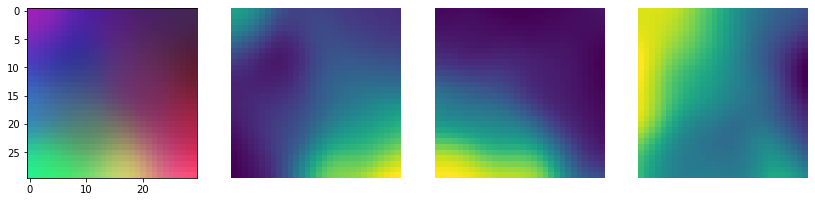

In [549]:
fig, ax = plt.subplots(nrows=1, ncols=choice_cs.shape[1]+1, figsize=(14,12))

ax[0].imshow(wts)

for i in range(choice_cs.shape[1]):
    ax[i+1].imshow(wts[:,:,i])
    ax[i+1].set_axis_off();

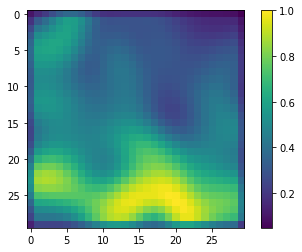

In [550]:
plt.imshow(som.distance_map())
plt.colorbar();

# TU dataset

In [497]:
from astropy.io import fits

path_TU = "datas/TU_created.fits"

with fits.open(path_TU) as hdul:
    hdr = hdul[0].header # header
    data_tu = hdul[1].data # data
    cols = hdul[1].columns # cols information
    Names = cols.names # cols names

In [498]:
hdul.info()

Filename: datas/TU_created.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     20   314709R x 6C   [D, D, D, D, D, D]   


In [499]:
Names

['mag', 'half_light_radius', 'q', 'SSersic_n', 'PA', 'bt']

In [501]:
sersic = data_tu['SSersic_n'] / max(data_tu['SSersic_n']) # normalisation de sersic pour le som

hlr_sup1 = np.argwhere(data_tu['half_light_radius']>1) # suppression des elements de hlr > 1

hlr = np.delete(data_tu['half_light_radius'],hlr_sup1)
q = np.delete(data_tu['q'],hlr_sup1)
sersic = np.delete(sersic,hlr_sup1)

len(hlr_sup1) # nombre d'elements supprimes

338

In [508]:
# hlr, sersic, q
choice_tu = np.vstack([hlr,sersic,q]).T
choice_tu.shape

(314371, 3)

In [509]:
som = MiniSom(som_x, som_y, choice.shape[1],
                sigma=7, learning_rate=1)

som.train(choice_tu, 5000, verbose=False)
#print('quantization error :', som.quantization_error(choice_tu))
#print('topographic error :', som.topographic_error(choice_tu))

wts = som.get_weights()

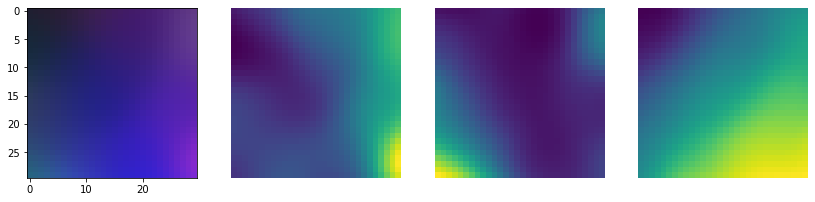

In [510]:
fig, ax = plt.subplots(nrows=1, ncols=choice_tu.shape[1]+1, figsize=(14,12))

main = ax[0].imshow(wts)

for i in range(choice_tu.shape[1]):
    ax[i+1].imshow(wts[:,:,i])
    ax[i+1].set_axis_off();

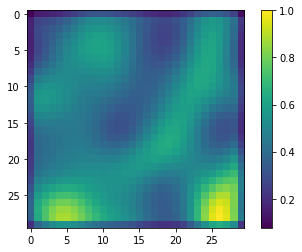

In [511]:
plt.imshow(som.distance_map())
plt.colorbar();